In [ ]:
import numpy as np, pandas as pd, nibabel as nib, os
import nilearn
from nltools import Brain_Data
import matplotlib.pyplot as plt
from glob import glob
from scipy import stats
import pickle as pkl

%matplotlib inline

In [ ]:
atlas_dir = 'masks'
epi_dir = '/fmri-preproc/'

In [ ]:
mni_file = nib.load(os.path.join(atlas_dir, '1_MNI152NLin2009cAsym_T1w_desc-brain.nii'))
# mni_data = mni_file.get_data()
r_amyg_mask = nib.load(os.path.join(atlas_dir, 'r_amyg_harvard_oxford.nii'))
l_amyg_mask = nib.load(os.path.join(atlas_dir, 'l_amyg_harvard_oxford.nii'))

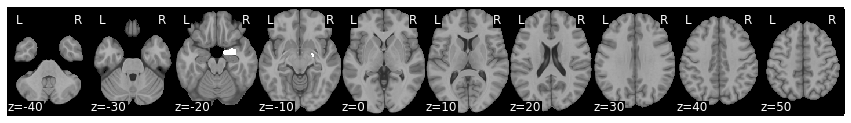

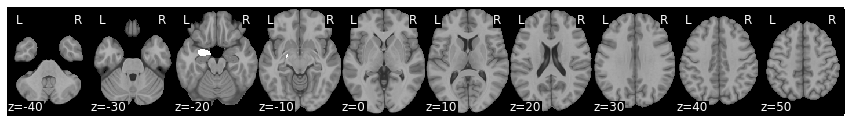

In [ ]:
Brain_Data(r_amyg_mask).plot(anatomical=mni_file)
Brain_Data(l_amyg_mask).plot(anatomical=mni_file)

In [ ]:
sub_ids = [os.path.basename(x) for x in glob(os.path.join(epi_dir,'sub*'))]
sub_files = glob(os.path.join(epi_dir,'sub*','func','sub-*preprocessedICA.nii.gz'))

In [ ]:
for sub_id, sub_file in zip(sub_ids, sub_files):
    print(sub_id, sub_file)

In [ ]:
raw_brain_data_lamyg = {}
zscore_brain_data_lamyg = {}

raw_brain_data_ramyg = {}
zscore_brain_data_ramyg = {}

for sub_id, sub_file in zip(sub_ids, sub_files):
    
    # load current subject data
    cur_sub_data_lamyg = Brain_Data(sub_file, mask=l_amyg_mask)
    cur_sub_data_ramyg = Brain_Data(sub_file, mask=r_amyg_mask)
    
    # compute mean at each TR and store in list, then add to subject list to dict
    # each list in *_brain_data would correspond to one subject
    raw_ts_lamyg = [np.mean(TR) for TR in cur_sub_data_lamyg.data]
    raw_ts_ramyg = [np.mean(TR) for TR in cur_sub_data_ramyg.data]
    
    # store raw data 
#     raw_brain_data[sub_id] = raw_ts
    
    # store zscored data
    zscore_brain_data_lamyg[sub_id] = stats.zscore(raw_ts_lamyg)
    zscore_brain_data_ramyg[sub_id] = stats.zscore(raw_ts_ramyg)

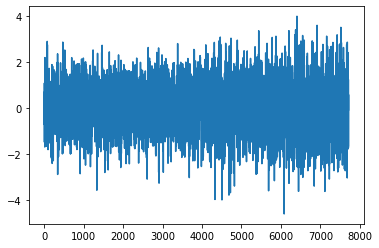

In [ ]:
plt.plot(zscore_brain_data_lamyg['sub-82'])
# plt.plot(zscore_brain_data['sub-10'])

In [ ]:
zscore_brain_data_lamyg

{'sub-9': array([-1.8164903 ,  1.6127266 ,  0.31557238, ..., -0.04358381,
        -0.50370055, -0.9271826 ], dtype=float32),
 'sub-8': array([ 0.46958253,  0.63021183, -1.6521659 , ...,  1.1086777 ,
         0.47334722, -0.96560013], dtype=float32),
 'sub-7': array([-0.61744654, -1.0933452 , -0.8756083 , ...,  0.3275407 ,
        -1.9410303 ,  0.4430264 ], dtype=float32),
 'sub-6': array([-0.15584734,  0.92636514,  0.24004209, ...,  0.9090731 ,
         1.1402142 ,  1.2472187 ], dtype=float32),
 'sub-5': array([-0.00750373,  0.03856652, -1.0377623 , ...,  1.1615484 ,
         0.44129035, -0.8789686 ], dtype=float32),
 'sub-4': array([-1.3590909 ,  0.7139831 , -1.1193018 , ..., -1.1762322 ,
        -0.43589458, -0.05166676], dtype=float32),
 'sub-3': array([ 0.33679974, -0.02128976, -1.9794792 , ..., -0.28383973,
         0.963591  , -1.2462451 ], dtype=float32),
 'sub-2': array([ 0.10430221, -1.0288035 , -2.3972049 , ...,  0.6796739 ,
         0.7467828 , -0.33457208], dtype=float32),


In [ ]:
df_lamyg = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in zscore_brain_data_lamyg.items()]))
df_ramyg = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in zscore_brain_data_ramyg.items()]))
df_lamygT = df_lamyg.T
df_ramygT = df_ramyg.T

In [ ]:
l = df_lamygT.index.tolist()
l2 = {}
for row in l:
    temp = row.split('-')
    l2[row] = int(temp[1])
l2 = sorted(l, key=lambda row: l2[row])
df_lamygT.reindex(l2)

,0,1,2,3,4,5,6,7,8,9,...,8872,8873,8874,8875,8876,8877,8878,8879,8880,8881
sub-1,-3.414195,-1.980726,-0.173855,3.414067,1.359372,-0.711514,-2.317778,2.174814,-0.999177,3.062898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-2,0.104302,-1.028803,-2.397205,0.909122,-1.353000,1.187146,0.641111,0.896236,0.613070,1.087422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-3,0.336800,-0.021290,-1.979479,-0.325970,-0.686092,-0.053824,3.032096,0.136250,0.783180,-0.716250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-4,-1.359091,0.713983,-1.119302,0.583545,-0.105390,1.208912,1.344289,0.173698,-0.024862,-0.615519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-5,-0.007504,0.038567,-1.037762,0.464053,0.173443,-0.758623,-0.077658,0.403739,0.035794,0.568489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-82,-0.088424,-0.102934,-0.297333,0.355277,-0.719424,0.100274,1.081798,-1.482936,0.232276,-0.392782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-83,0.263538,-0.636582,0.428314,-0.323350,-0.757630,0.208443,1.131735,-0.308646,-1.345374,1.975152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-84,-0.431156,-0.307337,0.466909,-0.275048,1.218305,-0.306605,-0.384270,-0.536053,0.685414,-1.201591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-85,-1.258761,1.094012,0.625977,-0.855049,-1.395931,0.048365,-0.083110,-0.125765,-0.210105,-0.175258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
r = df_ramygT.index.tolist()
r2 = {}
for row in r:
    temp = row.split('-')
    r2[row] = int(temp[1])
r2 = sorted(r, key=lambda row: r2[row])
df_ramygT.reindex(r2)

,0,1,2,3,4,5,6,7,8,9,...,8872,8873,8874,8875,8876,8877,8878,8879,8880,8881
sub-1,2.675195,-1.534641,0.273193,-2.443353,-1.787369,3.705651,-1.224764,1.419780,0.770952,1.166528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-2,-0.451512,0.330516,-0.267525,-0.069652,1.025645,0.840864,0.677744,0.796774,-1.089442,0.694220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-3,0.746481,0.195691,-0.907646,0.038920,-0.768226,0.625811,-0.130508,1.315112,-0.219741,-0.468658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-4,0.247209,-0.006251,-0.108443,-1.264034,-1.015870,0.288687,0.347748,0.487118,1.218235,1.416875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-5,-0.925223,0.341460,1.654739,-1.062825,-0.353214,-0.178105,0.770243,-1.099428,0.020998,-0.264664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-82,0.192897,0.072305,-1.047811,-0.309519,-0.474592,0.401857,1.705003,1.545734,-1.954441,-0.269559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-83,0.055404,1.546799,-0.606684,-0.722603,0.244910,-0.592049,-1.044525,1.196971,0.209504,2.047732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-84,0.470639,-0.081601,-0.618018,-1.309385,0.904080,-0.297711,0.211276,0.638600,-0.453101,0.066556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-85,-0.185057,-0.587197,1.257627,2.189578,-1.312391,0.096093,-1.153868,1.727292,0.197393,-0.081877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# save to csv
df_lamyg.to_csv('lamyg_zscored_ts.csv')
df_ramyg.to_csv('ramyg_zscored_ts.csv')
df_lamygT.to_csv('lamygT_zscored_ts.csv')
df_ramygT.to_csv('ramygT_zscored_ts.csv')

# save to pkl
df_lamyg.to_pickle('lamyg_zscored_ts.pkl')
df_ramyg.to_pickle('ramyg_zscored_ts.pkl')
df_lamygT.to_csv('lamygT_zscored_ts.csv')
df_ramygT.to_csv('ramygT_zscored_ts.csv')